# Import packages

Import python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from math import sqrt

# Obtain data

Read data CSV into Pandas

In [2]:
df = pd.read_csv('dataset_Facebook.csv', delimiter=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Access df.info overview of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

Drop extra dependent variables not being modeled

In [4]:
drop_columns = ['Total Interactions','share','like','comment', 'Lifetime Post Consumptions', 
                'Lifetime Engaged Users', 'Lifetime Post Total Impressions', 'Lifetime Post Total Reach',
                'Lifetime People who have liked your Page and engaged with your post', 
                'Lifetime Post reach by people who like your Page',
                'Lifetime Post Impressions by people who have liked your Page']
df.drop(columns = drop_columns, inplace=True)

# Scrub Data

Access df.info overview of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Page total likes         500 non-null    int64  
 1   Type                     500 non-null    object 
 2   Category                 500 non-null    int64  
 3   Post Month               500 non-null    int64  
 4   Post Weekday             500 non-null    int64  
 5   Post Hour                500 non-null    int64  
 6   Paid                     499 non-null    float64
 7   Lifetime Post Consumers  500 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 31.4+ KB


Define function to create dummy variables for categorical features and use function to create dummies

In [6]:
def create_dummies(df, column):
    dummies_df = pd.get_dummies(df[column],drop_first=True)
    dummies_df_columns = []
    for name in list(df.groupby(column).first().index)[1:]:
        dummies_df_columns.append(column+': '+str(name))   
    dummies_df.columns = dummies_df_columns
    df.drop(columns=[column], inplace=True)
    return pd.concat([df,dummies_df], axis = 1)

dummy_columns = ['Type','Category', 'Post Month', 'Post Weekday', 'Post Hour']
for column in dummy_columns:
    df = create_dummies(df, column)
df.head()

,Page total likes,Paid,Lifetime Post Consumers,Type: Photo,Type: Status,Type: Video,Category: 2,Category: 3,Post Month: 2,Post Month: 3,...,Post Hour: 13,Post Hour: 14,Post Hour: 15,Post Hour: 16,Post Hour: 17,Post Hour: 18,Post Hour: 19,Post Hour: 20,Post Hour: 22,Post Hour: 23
0,139441,0.0,109,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,139441,0.0,1361,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,139441,0.0,113,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,139441,1.0,790,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,139441,0.0,410,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Fill missing values with feature mean value

In [7]:
df.fillna(df.mean(), inplace=True)

Access df.info overview of scrubbed data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Page total likes         500 non-null    int64  
 1   Paid                     500 non-null    float64
 2   Lifetime Post Consumers  500 non-null    int64  
 3   Type: Photo              500 non-null    uint8  
 4   Type: Status             500 non-null    uint8  
 5   Type: Video              500 non-null    uint8  
 6   Category: 2              500 non-null    uint8  
 7   Category: 3              500 non-null    uint8  
 8   Post Month: 2            500 non-null    uint8  
 9   Post Month: 3            500 non-null    uint8  
 10  Post Month: 4            500 non-null    uint8  
 11  Post Month: 5            500 non-null    uint8  
 12  Post Month: 6            500 non-null    uint8  
 13  Post Month: 7            500 non-null    uint8  
 14  Post Month: 8            5

# Explore data

Access descriptive statistics of dependent variable, 'Lifetime Post Consumers'

In [9]:
df['Lifetime Post Consumers'].describe()

count      500.000000
mean       798.772000
std        882.505013
min          9.000000
25%        332.500000
50%        551.500000
75%        955.500000
max      11328.000000
Name: Lifetime Post Consumers, dtype: float64

Create boxplot for dependent variable, 'Lifetime Post Consumers'

Text(0.5, 1.0, 'Lifetime Post Consumers Boxplot')

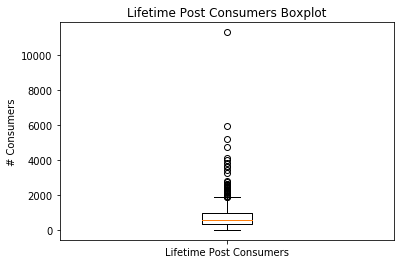

In [10]:
fig, ax = plt.subplots()
ax.boxplot(df['Lifetime Post Consumers'])
ax.set_xticklabels(['Lifetime Post Consumers'])
ax.set_ylabel('# Consumers')
ax.set_title('Lifetime Post Consumers Boxplot')

View top outliers for independent variable, 'Lifetime Post Consumers'

In [11]:
df['Lifetime Post Consumers'].sort_values(ascending=False)[0:20]

446    11328
142     5934
38      5202
172     4754
10      4100
244     4010
243     3822
275     3682
460     3586
46      3464
223     3244
482     2833
225     2781
121     2654
105     2628
175     2584
109     2570
371     2567
26      2531
272     2495
Name: Lifetime Post Consumers, dtype: int64

Create pairplots to represent the relationship between each feature and the dependent variable

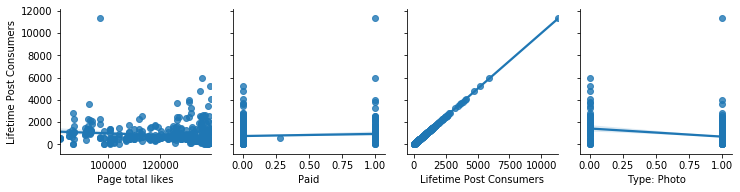

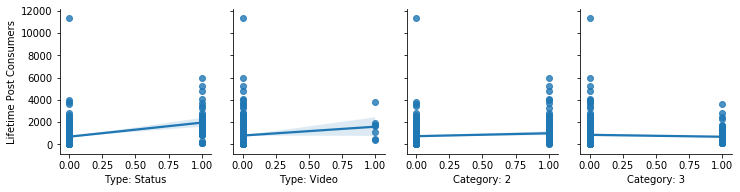

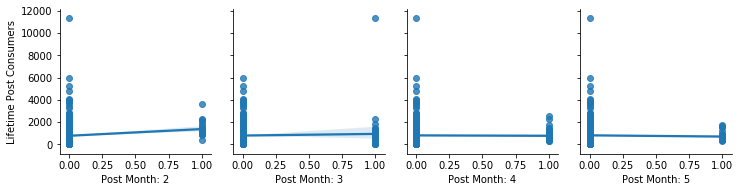

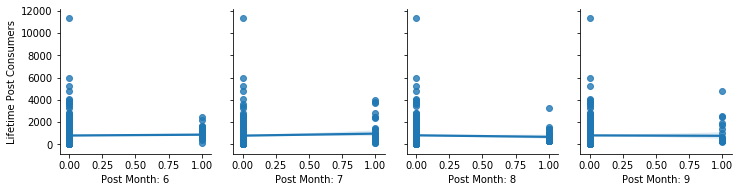

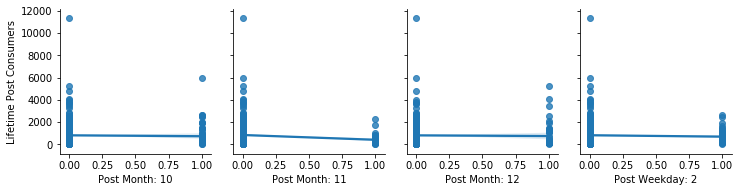

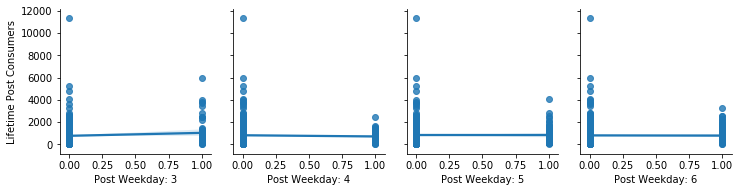

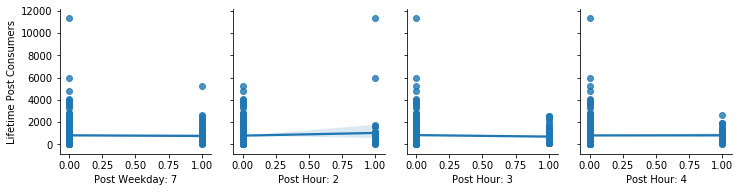

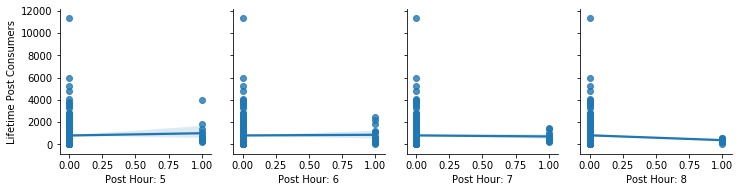

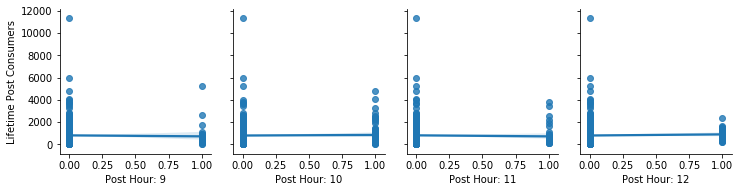

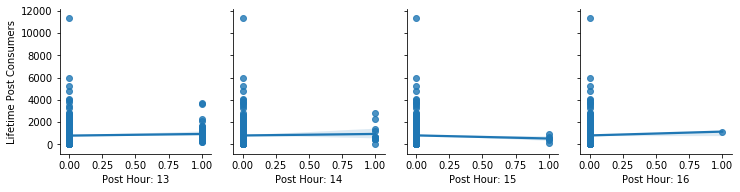

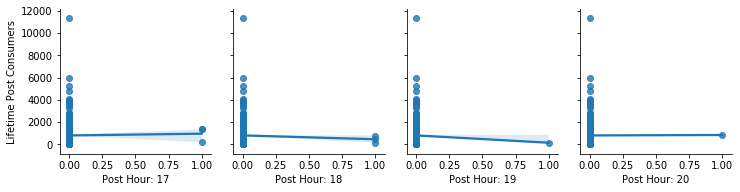

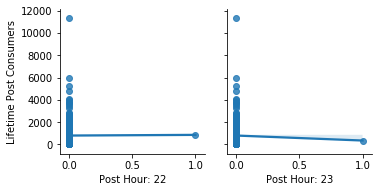

In [12]:
cols_list = [list(df.columns)[num:num+4] for num in range(0,len(df.columns),4) ]
for cols in cols_list:
    sns.pairplot(df, x_vars = cols, y_vars=['Lifetime Post Consumers'], kind='reg')

Create heatmap to represent correlations in dataset

Text(0.5, 1, 'Feature Correlation Heatmap')

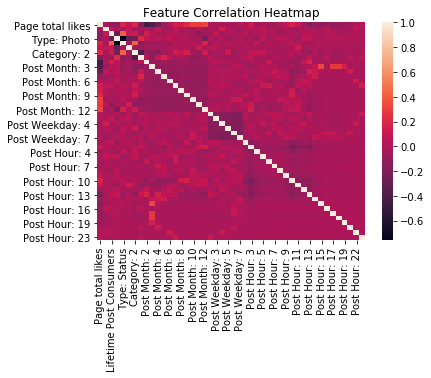

In [13]:
sns.heatmap(df.corr()).set_title('Feature Correlation Heatmap')

View numerical values for most correlated features from the above heatmap

In [14]:
df.corr()[0:10]

,Page total likes,Paid,Lifetime Post Consumers,Type: Photo,Type: Status,Type: Video,Category: 2,Category: 3,Post Month: 2,Post Month: 3,...,Post Hour: 13,Post Hour: 14,Post Hour: 15,Post Hour: 16,Post Hour: 17,Post Hour: 18,Post Hour: 19,Post Hour: 20,Post Hour: 22,Post Hour: 23
Page total likes,1.000000,0.005306,-0.149129,-0.123977,0.182867,0.086644,0.199087,-0.178341,-0.444418,-0.389085,...,-0.194140,-0.089703,-0.131376,-0.099920,-0.107351,-0.102954,-0.058055,-0.037242,0.008115,0.023230
Paid,0.005306,1.000000,0.097669,0.007712,-0.039560,0.077925,-0.040052,-0.001703,0.015237,-0.035039,...,0.007535,-0.017434,-0.027535,0.072115,-0.048325,-0.048325,-0.027845,-0.027845,0.072115,-0.027845
Lifetime Post Consumers,-0.149129,0.097669,1.000000,-0.294846,0.410499,0.106227,0.130147,-0.090423,0.152065,0.043734,...,0.051603,0.024733,-0.034744,0.017479,0.013768,-0.030354,-0.033349,0.001992,0.003109,-0.022737
Type: Photo,-0.123977,0.007712,-0.294846,1.000000,-0.754553,-0.285900,-0.253725,0.218472,0.072246,0.028936,...,0.086644,-0.002690,-0.005793,0.018658,0.032381,0.032381,0.018658,0.018658,0.018658,0.018658
Type: Status,0.182867,-0.039560,0.410499,-0.754553,1.000000,-0.037474,0.419026,-0.150351,-0.073654,-0.060561,...,-0.084249,-0.007466,0.029524,-0.014078,-0.024433,-0.024433,-0.014078,-0.014078,-0.014078,-0.014078
Type: Video,0.086644,0.077925,0.106227,-0.285900,-0.037474,1.000000,-0.070631,-0.079870,-0.027908,-0.033191,...,0.015168,-0.019469,-0.013132,-0.005334,-0.009258,-0.009258,-0.005334,-0.005334,-0.005334,-0.005334
Category: 2,0.199087,-0.040052,0.130147,-0.253725,0.419026,-0.070631,1.000000,-0.397308,-0.077216,-0.129827,...,-0.097388,0.017765,-0.065326,-0.026535,-0.046053,-0.046053,-0.026535,-0.026535,-0.026535,-0.026535
Category: 3,-0.178341,-0.001703,-0.090423,0.218472,-0.150351,-0.079870,-0.397308,1.000000,0.057262,-0.136513,...,0.097464,-0.000815,-0.034155,0.066787,-0.052076,-0.052076,-0.030006,0.066787,-0.030006,0.066787
Post Month: 2,-0.444418,0.015237,0.152065,0.072246,-0.073654,-0.027908,-0.077216,0.057262,1.000000,-0.065236,...,0.185788,-0.038265,-0.025811,-0.010484,-0.018196,-0.018196,-0.010484,-0.010484,-0.010484,-0.010484
Post Month: 3,-0.389085,-0.035039,0.043734,0.028936,-0.060561,-0.033191,-0.129827,-0.136513,-0.065236,1.000000,...,-0.018858,0.100354,0.324599,-0.012469,0.278927,0.278927,0.160715,-0.012469,-0.012469,-0.012469


# Model data

Create x and y variables form df

In [20]:
x_columns = df.columns
x_columns = x_columns.drop('Lifetime Post Consumers')
x = df[x_columns]
y = df['Lifetime Post Consumers']

Perform Train Test Split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=27)

Scale data using standard scaler

In [17]:
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

Build Dummy Regressor model

In [18]:
dr = DummyRegressor()
dr.fit(x_train, y_train)
y_train_pred_dr = dr.predict(x_train)
y_test_pred_dr = dr.predict(x_test)
print('dr train RMSE', sqrt(mean_squared_error(y_train, y_train_pred_dr)))
print('dr test RMSE', sqrt(mean_squared_error(y_test, y_test_pred_dr)))
print('dr train MAE', mean_absolute_error(y_train, y_train_pred_dr))
print('dr test MAE', mean_absolute_error(y_test, y_test_pred_dr))

dr train RMSE 855.2104111204965
dr test RMSE 957.8603745524595
dr train MAE 503.4331733333333
dr test MAE 572.1128533333336


Build Linear Regression Model

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)
print('lr train RMSE', sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print('lr test RMSE', sqrt(mean_squared_error(y_test, y_test_pred_lr)))
print('lr train MAE', mean_absolute_error(y_train, y_train_pred_lr))
print('lr test MAE', mean_absolute_error(y_test, y_test_pred_lr))

lr train RMSE 708.59606669555
lr test RMSE 810.6117158452463
lr train MAE 381.8925727895999
lr test MAE 500.56111709046655


In [20]:
sum(abs((y_train_pred_lr-y_train)/y_train))/len(y_train)

1.0864663286259484

Build Lasso Regression model

In [21]:
lasso_dict = {'alpha': range(1, 100)}
lasso_model = Lasso()
lasso = GridSearchCV(lasso_model,lasso_dict, cv=5, n_jobs=-1, 
                     scoring='neg_root_mean_squared_error', verbose=1) 
lasso.fit(x_train, y_train)
print(lasso.best_params_)
y_train_pred_lasso = lasso.predict(x_train)
y_test_pred_lasso = lasso.predict(x_test)
print('lasso train RMSE', sqrt(mean_squared_error(y_train, y_train_pred_lasso)))
print('lasso test RMSE', sqrt(mean_squared_error(y_test, y_test_pred_lasso)))
print('lasso train MAE', mean_absolute_error(y_train, y_train_pred_lasso))
print('lasso test MAE', mean_absolute_error(y_test, y_test_pred_lasso))

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.8s


{'alpha': 47}
lasso train RMSE 759.5177587936113
lasso test RMSE 809.6999199488888
lasso train MAE 393.33653612061914
lasso test MAE 466.82151581338456


[Parallel(n_jobs=-1)]: Done 488 out of 495 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    3.4s finished


Build Ridge Regression model

In [22]:
ridge_dict = {'alpha': [x * 0.1 for x in range(1000, 2000)]}
ridge_model = Ridge()
ridge = GridSearchCV(ridge_model,ridge_dict, cv=5, n_jobs=-1, 
                     scoring='neg_root_mean_squared_error', verbose=1) 
ridge.fit(x_train, y_train)
print(ridge.best_params_)
y_train_pred_ridge = ridge.predict(x_train)
y_test_pred_ridge = ridge.predict(x_test)
print('ridge train RMSE', sqrt(mean_squared_error(y_train, y_train_pred_ridge)))
print('ridge test RMSE', sqrt(mean_squared_error(y_test, y_test_pred_ridge)))
print('ridge train MAE', mean_absolute_error(y_train, y_train_pred_ridge))
print('ridge test MAE', mean_absolute_error(y_test, y_test_pred_ridge))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.6s


{'alpha': 173.20000000000002}
ridge train RMSE 745.6097349014077
ridge test RMSE 815.1054389120417
ridge train MAE 384.21244857074475
ridge test MAE 466.13527738100964


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    6.3s finished


Build Random Forest Regression model

In [26]:
rf_dict = {'max_leaf_nodes': range(15, 35), 'min_samples_leaf': range(5,20)}
rf_model = RandomForestRegressor()
rf = GridSearchCV(rf_model,rf_dict, cv=5, n_jobs=-1, 
                     scoring='neg_root_mean_squared_error', verbose=1) 
rf.fit(x_train, y_train)
print(rf.best_params_)
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)
print('rf train RMSE', sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print('rf test RMSE', sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print('rf train MAE', mean_absolute_error(y_train, y_train_pred_rf))
print('rf test MAE', mean_absolute_error(y_test, y_test_pred_rf))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.2min finished


{'max_leaf_nodes': 34, 'min_samples_leaf': 11}
rf train RMSE 701.7139261183884
rf test RMSE 801.8809055919
rf train MAE 336.23730982491924
rf test MAE 456.9947515799958


Build Support Vector Regression model

In [28]:
from sklearn.svm import SVR
svr_dict = {'epsilon': range(10, 300, 10), 'C': range(1000, 3000, 100)}
svr_model = SVR()
svr = GridSearchCV(svr_model,svr_dict, cv=5, n_jobs=-1, 
                     scoring='neg_root_mean_squared_error', verbose=1) 
svr.fit(x_train, y_train)
print(svr.best_params_)
y_train_pred_svr = svr.predict(x_train)
y_test_pred_svr = svr.predict(x_test)
print('rf train RMSE', sqrt(mean_squared_error(y_train, y_train_pred_svr)))
print('rf test RMSE', sqrt(mean_squared_error(y_test, y_test_pred_svr)))
print('rf train MAE', mean_absolute_error(y_train, y_train_pred_svr))
print('rf test MAE', mean_absolute_error(y_test, y_test_pred_svr))

Fitting 5 folds for each of 580 candidates, totalling 2900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    8.0s


{'C': 1900, 'epsilon': 160}
rf train RMSE 606.9857878771988
rf test RMSE 772.2137719027859
rf train MAE 213.3496236154367
rf test MAE 431.92670423184376


[Parallel(n_jobs=-1)]: Done 2900 out of 2900 | elapsed:   16.5s finished


Build Voting Regressor model

In [31]:
from sklearn.ensemble import VotingRegressor
v_lr = LinearRegression()
v_lasso = Lasso(alpha = 47)
v_ridge = Ridge(alpha = 173)
v_rf = RandomForestRegressor(max_leaf_nodes = 34, min_samples_leaf = 11)
v_svr = SVR(C=1860, epsilon=161)
vr = VotingRegressor(estimators=[('rf', v_rf), ('svr', v_svr)])
vr.fit(x_train, y_train)

y_train_pred_v = vr.predict(x_train)
y_test_pred_v = vr.predict(x_test)
print('rf train RMSE', sqrt(mean_squared_error(y_train, y_train_pred_v)))
print('rf test RMSE', sqrt(mean_squared_error(y_test, y_test_pred_v)))
print('rf train MAE', mean_absolute_error(y_train, y_train_pred_v))
print('rf test MAE', mean_absolute_error(y_test, y_test_pred_v))

rf train RMSE 641.1799979082006
rf test RMSE 776.3201464188072
rf train MAE 266.4982085308788
rf test MAE 438.9851287385929


# Outlier Removed Modeling

Remove outlier datapoint

In [ ]:
filt_df = df[df['Lifetime Post Consumers']<10000]
filt_df.sort_values(by='Lifetime Post Consumers', ascending=False).head()

Create x and y variables form filtered df

In [43]:
filt_x = filt_df[x_columns]
filt_y = filt_df['Lifetime Post Consumers']

Perform Train Test Split on outler removed dataset

In [44]:
filt_x_train, filt_x_test, filt_y_train, filt_y_test = train_test_split(filt_x, filt_y,random_state=27)

Standardize outler removed dataset

In [45]:
ss_filt = StandardScaler()
ss_filt.fit(filt_x_train)
filt_x_train = ss.transform(filt_x_train)
filt_x_test = ss.transform(filt_x_test)

Run Dummy Regressor model on outlier removed dataset

In [47]:
filt_dr = DummyRegressor()
filt_dr.fit(filt_x_train, filt_y_train)
filt_y_train_pred_dr = filt_dr.predict(filt_x_train)
filt_y_test_pred_dr = filt_dr.predict(filt_x_test)
print('dr train RMSE', sqrt(mean_squared_error(filt_y_train, filt_y_train_pred_dr)))
print('dr test RMSE', sqrt(mean_squared_error(filt_y_test, filt_y_test_pred_dr)))
print('dr train MAE', mean_absolute_error(filt_y_train, filt_y_train_pred_dr))
print('dr test MAE', mean_absolute_error(filt_y_test, filt_y_test_pred_dr))

dr train RMSE 679.528272908791
dr test RMSE 916.0834590957451
dr train MAE 489.3972375532615
dr test MAE 524.6919786096257


Run Support Vector Regression model on outlier removed dataset

In [46]:
filt_svr_dict = {'epsilon': range(10, 300, 10), 'C': range(1000, 3000, 100)}
filt_svr_model = SVR()
filt_svr = GridSearchCV(filt_svr_model,filt_svr_dict, cv=5, n_jobs=-1, 
                     scoring='neg_root_mean_squared_error', verbose=1) 
filt_svr.fit(filt_x_train, filt_y_train)
print(filt_svr.best_params_)
filt_y_train_pred_svr = filt_svr.predict(filt_x_train)
filt_y_test_pred_svr = filt_svr.predict(filt_x_test)
print('rf train RMSE', sqrt(mean_squared_error(filt_y_train, filt_y_train_pred_svr)))
print('rf test RMSE', sqrt(mean_squared_error(filt_y_test, filt_y_test_pred_svr)))
print('rf train MAE', mean_absolute_error(filt_y_train, filt_y_train_pred_svr))
print('rf test MAE', mean_absolute_error(filt_y_test, filt_y_test_pred_svr))

Fitting 5 folds for each of 580 candidates, totalling 2900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   25.1s


{'C': 1700, 'epsilon': 100}
rf train RMSE 335.3972071673843
rf test RMSE 779.4526363841934
rf train MAE 164.1494729908216
rf test MAE 403.60482295331235


[Parallel(n_jobs=-1)]: Done 2900 out of 2900 | elapsed:   42.9s finished
